# Audio DTW

### Import Library
Cell ini berfungsi untuk mengimpor semua library Python yang diperlukan untuk proyek ini, seperti `librosa` untuk analisis audio, `pandas` dan `numpy` untuk manipulasi data, `matplotlib` untuk visualisasi, dan `sklearn` untuk pemodelan machine learning.

In [1]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav
import os
import time

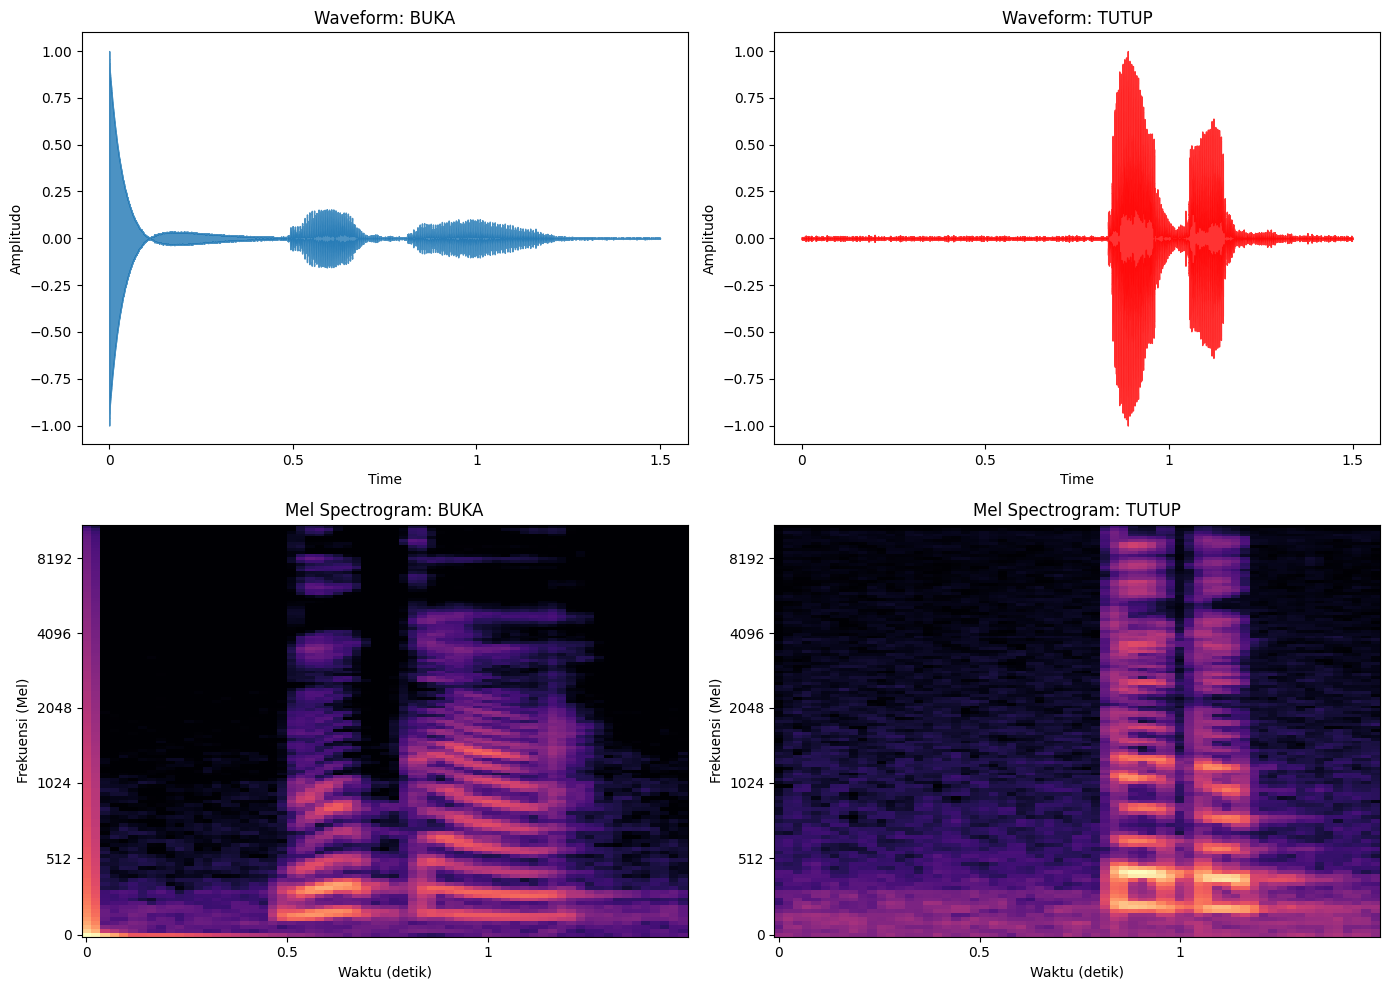

In [2]:
import matplotlib.pyplot as plt
import librosa.display

# --- Mari kita visualisasikan 1 sampel "BUKA" dan 1 sampel "TUTUP" ---

# Tentukan path ke data Anda
PATH_DATA = "./dataset/data-hasil/"
SAMPLE_RATE = 22050

# Ambil 1 contoh file
file_buka = os.path.join(PATH_DATA, "buka", "buka_001.wav")
file_tutup = os.path.join(PATH_DATA, "tutup", "tutup_001.wav")

# Muat file audio
y_buka, sr_buka = librosa.load(file_buka, sr=SAMPLE_RATE)
y_tutup, sr_tutup = librosa.load(file_tutup, sr=SAMPLE_RATE)

# --- Plotting ---
plt.figure(figsize=(14, 10))

# 1. Plot Waveform BUKA
plt.subplot(2, 2, 1)
librosa.display.waveshow(y_buka, sr=sr_buka, alpha=0.8)
plt.title('Waveform: BUKA')
plt.ylabel('Amplitudo')

# 2. Plot Waveform TUTUP
plt.subplot(2, 2, 2)
librosa.display.waveshow(y_tutup, sr=sr_tutup, color='r', alpha=0.8)
plt.title('Waveform: TUTUP')
plt.ylabel('Amplitudo')

# 3. Plot Mel Spectrogram BUKA
# Spectrogram lebih baik dalam menunjukkan 'karakter' suara
S_buka = librosa.feature.melspectrogram(y=y_buka, sr=sr_buka, n_mels=128)
S_db_buka = librosa.power_to_db(S_buka, ref=np.max)
plt.subplot(2, 2, 3)
librosa.display.specshow(S_db_buka, sr=sr_buka, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram: BUKA')
plt.ylabel('Frekuensi (Mel)')
plt.xlabel('Waktu (detik)')

# 4. Plot Mel Spectrogram TUTUP
S_tutup = librosa.feature.melspectrogram(y=y_tutup, sr=sr_tutup, n_mels=128)
S_db_tutup = librosa.power_to_db(S_tutup, ref=np.max)
plt.subplot(2, 2, 4)
librosa.display.specshow(S_db_tutup, sr=sr_tutup, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram: TUTUP')
plt.ylabel('Frekuensi (Mel)')
plt.xlabel('Waktu (detik)')

plt.tight_layout()
plt.show()

In [3]:
import librosa
import numpy as np
import pandas as pd
import os

# --- KONFIGURASI ---
PATH_DATA = "./dataset/data-hasil/"  # Pastikan folder ini ada isinya
LABELS = ["buka", "tutup"]
SAMPLE_RATE = 22050
N_MFCC = 20  # Kita ingin 20 angka per audio

data_fitur = []

print("Sedang membaca data dan mengubah menjadi angka...")

for label in LABELS:
    folder_path = os.path.join(PATH_DATA, label)
    
    # Cek apakah folder ada
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} tidak ditemukan!")
        continue

    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # 1. BACA AUDIO (MENGHASILKAN ARRAY RIBUAN ANGKA)
        # y = array amplitudo suara, sr = sampling rate
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        
        # 2. UBAH JADI MFCC (MENGHASILKAN MATRIX FITUR)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
        
        # 3. RATA-RATA (MENGHASILKAN 20 ANGKA FINAL)
        # Kita ambil rata-rata agar setiap audio punya jumlah fitur yang sama
        mfccs_rata_rata = np.mean(mfccs.T, axis=0)
        
        # Simpan ke list sementara
        item = {f'mfcc_{i}': mfccs_rata_rata[i] for i in range(N_MFCC)}
        item['label'] = label
        item['nama_file'] = file_name
        data_fitur.append(item)

# --- MENAMPILKAN HASIL ---
df_angka = pd.DataFrame(data_fitur)

print("\nBentuk Angka dari Dataset Audio Anda:")
# Tampilkan 5 baris pertama
print(df_angka.head())

# Tampilkan info ukuran data
print(f"\nTotal Data: {df_angka.shape[0]} baris")
print(f"Total Fitur (Kolom Angka): {N_MFCC}")

Sedang membaca data dan mengubah menjadi angka...

Bentuk Angka dari Dataset Audio Anda:
       mfcc_0     mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0 -391.825195  86.733055  21.756060  13.757183   9.030744  12.091555   
1 -219.554581  95.143524  23.050543  11.273750  12.111441   7.253877   
2 -231.499649  95.491196  21.786690  16.874832   9.731382  10.766232   
3 -239.903519  93.402954  20.391285  14.796158   7.593359   8.971307   
4 -239.522278  96.243011  13.798207  11.316676   9.502037   7.641552   

      mfcc_6    mfcc_7    mfcc_8    mfcc_9  ...   mfcc_12   mfcc_13   mfcc_14  \
0  12.048173  0.365709  1.737657  5.475190  ... -5.571948 -4.757148 -3.288465   
1  12.820862 -2.045698 -0.279506  7.276806  ... -9.191520 -6.422854 -3.832167   
2  14.763392  2.315336  0.482845  3.260504  ... -7.362328 -1.683394 -0.336681   
3  12.700639 -0.081058  0.001442  4.289254  ... -8.099751 -2.410700 -0.211259   
4  16.703917  0.591387 -1.314283  5.297466  ... -7.202394 -7.726523  0.50

In [4]:
import sounddevice as sd
import scipy.io.wavfile as wav
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
# --- KONFIGURASI ---
PATH_DATASET_TUTUP = "./dataset/data-hasil/tutup/"  # Folder dataset minggu lalu
FILE_BARU = "tutup_test_baru.wav"
SAMPLE_RATE = 22050
DURASI = 1.5 # Detik

# ==========================================
# 1. REKAM SUARA BARU
# ==========================================
def rekam_satu_kata(nama_file):
    print(f"\n--- Merekam Suara Baru '{nama_file}' ---")
    print("Bersiap... 3")
    sd.sleep(1000)
    print("2")
    sd.sleep(1000)
    print("1")
    sd.sleep(1000)
    print("BICARA SEKARANG ('TUTUP')!")
    
    # Merekam
    audio = sd.rec(int(DURASI * SAMPLE_RATE), samplerate=SAMPLE_RATE, channels=1, dtype='float32')
    sd.wait()
    print("Selesai Merekam.")
    
    # Simpan
    # Normalisasi agar volume konsisten
    audio = audio / np.max(np.abs(audio))
    audio_int16 = (audio * 32767).astype(np.int16)
    wav.write(nama_file, SAMPLE_RATE, audio_int16)
    print(f"File tersimpan: {nama_file}\n")

# Jalankan Perekaman
rekam_satu_kata(FILE_BARU)


--- Merekam Suara Baru 'tutup_test_baru.wav' ---
Bersiap... 3
2
1
BICARA SEKARANG ('TUTUP')!
Selesai Merekam.
File tersimpan: tutup_test_baru.wav



In [9]:
# ==========================================
# 2. FUNGSI HITUNG DTW
# ==========================================
def hitung_dtw(file1, file2):
    # Load Audio
    y1, _ = librosa.load(file1, sr=SAMPLE_RATE)
    y2, _ = librosa.load(file2, sr=SAMPLE_RATE)
    
    # Ekstrak MFCC (Fitur)
    # Kita TIDAK merata-rata (mean) di sini, karena DTW butuh urutan waktu
    mfcc1 = librosa.feature.mfcc(y=y1, sr=SAMPLE_RATE, n_mfcc=13)
    mfcc2 = librosa.feature.mfcc(y=y2, sr=SAMPLE_RATE, n_mfcc=13)
    
    # Hitung DTW menggunakan Librosa
    # D = Cost Matrix, wp = Warping Path
    D, wp = librosa.sequence.dtw(mfcc1, mfcc2, subseq=True)
    
    # Jarak (Distance) adalah biaya terakumulasi terakhir dibagi panjang path
    # Semakin KECIL jaraknya, semakin MIRIP suaranya
    dist = D[-1, -1] / wp.shape[0]
    
    return dist, mfcc1, mfcc2, wp

Sedang membandingkan dengan dataset lama menggunakan DTW...
Jarak vs tutup_001.wav: 122.7953
Jarak vs tutup_002.wav: 108.2975
Jarak vs tutup_003.wav: 112.6680
Jarak vs tutup_004.wav: 123.7238
Jarak vs tutup_005.wav: 141.4895
Jarak vs tutup_006.wav: 133.7262
Jarak vs tutup_007.wav: 115.6805
Jarak vs tutup_008.wav: 130.7670
Jarak vs tutup_009.wav: 126.3620
Jarak vs tutup_010.wav: 121.7786
Jarak vs tutup_011.wav: 131.4484
Jarak vs tutup_012.wav: 132.0264
Jarak vs tutup_013.wav: 130.0943
Jarak vs tutup_014.wav: 130.3142
Jarak vs tutup_015.wav: 117.7362
Jarak vs tutup_016.wav: 117.2011
Jarak vs tutup_017.wav: 122.4018
Jarak vs tutup_018.wav: 121.2256
Jarak vs tutup_019.wav: 131.0524
Jarak vs tutup_020.wav: 143.4121
Jarak vs tutup_021.wav: 121.7772
Jarak vs tutup_022.wav: 125.4767
Jarak vs tutup_023.wav: 125.8379
Jarak vs tutup_024.wav: 126.4216
Jarak vs tutup_025.wav: 122.8212
Jarak vs tutup_026.wav: 125.0697
Jarak vs tutup_027.wav: 119.6622
Jarak vs tutup_028.wav: 119.3150
Jarak vs tutup_0

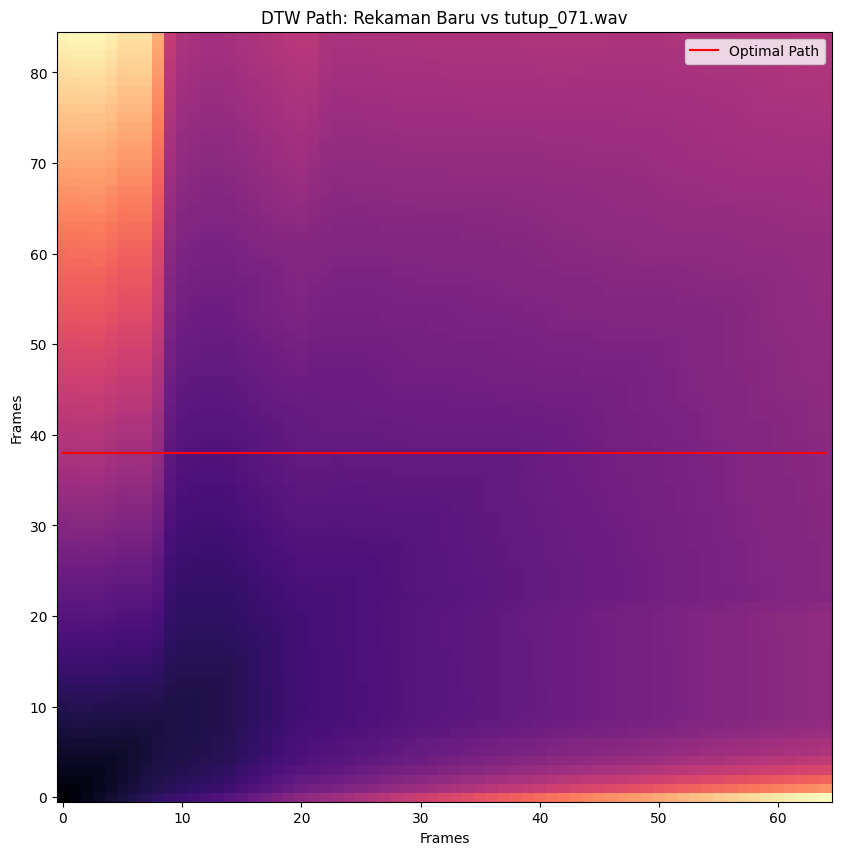

In [14]:
# ==========================================
# 3. BANDINGKAN DENGAN DATASET LAMA
# ==========================================
print("Sedang membandingkan dengan dataset lama menggunakan DTW...")

hasil_perbandingan = []

# Cek apakah folder dataset ada
if os.path.exists(PATH_DATASET_TUTUP):
    files = [f for f in os.listdir(PATH_DATASET_TUTUP) if f.endswith('.wav')]
    
    if not files:
        print("Error: Folder dataset kosong!")
    else:
        for file_lama in files:
            path_file_lama = os.path.join(PATH_DATASET_TUTUP, file_lama)
            
            try:
                # Hitung Jarak DTW
                jarak, _, _, _ = hitung_dtw(FILE_BARU, path_file_lama)
                
                hasil_perbandingan.append({
                    'file': file_lama,
                    'jarak_dtw': jarak
                })
                print(f"Jarak vs {file_lama}: {jarak:.4f}")
                
            except Exception as e:
                print(f"Gagal memproses {file_lama}: {e}")

        # --- HASIL AKHIR ---
        # Urutkan dari jarak terkecil (Paling Mirip)
        hasil_perbandingan.sort(key=lambda x: x['jarak_dtw'])
        
        terbaik = hasil_perbandingan[0]
        
        print("\n" + "="*40)
        print("HASIL ANALISIS DTW")
        print("="*40)
        print(f"File Rekaman Baru: {FILE_BARU}")
        print(f"Paling Mirip dengan: {terbaik['file']}")
        print(f"Skor Jarak DTW: {terbaik['jarak_dtw']:.4f} (Semakin kecil semakin mirip)")
        
        # --- VISUALISASI DTW (Opsional) ---
        # Kita plot warping path antara rekaman baru vs file terbaik
        print("\nMenampilkan Visualisasi Warping Path...")
        dist, mfcc_baru, mfcc_best, wp = hitung_dtw(FILE_BARU, os.path.join(PATH_DATASET_TUTUP, terbaik['file']))
        
        plt.figure(figsize=(10, 10))
        
        # Plot Matriks Biaya & Jalur
        # Sumbu X = Waktu File Lama, Sumbu Y = Waktu File Baru
        plt.subplot(1, 1, 1)
        librosa.display.specshow(librosa.sequence.dtw(mfcc_baru, mfcc_best)[0], x_axis='frames', y_axis='frames')
        plt.plot(wp[:, 1], wp[:, 0], label='Optimal Path', color='r')
        plt.title(f'DTW Path: Rekaman Baru vs {terbaik["file"]}')
        plt.legend()
        plt.show()

else:
    print(f"Error: Folder {PATH_DATASET_TUTUP} tidak ditemukan. Pastikan path sesuai!")

Sedang membandingkan 'tutup_test_baru.wav' dengan seluruh dataset di './dataset/data-hasil/tutup/'...
Memproses 10/100 data...
Memproses 20/100 data...
Memproses 30/100 data...
Memproses 40/100 data...
Memproses 50/100 data...
Memproses 60/100 data...
Memproses 70/100 data...
Memproses 80/100 data...
Memproses 90/100 data...
Memproses 100/100 data...

TOP 10 SUARA PALING MIRIP (Jarak Terkecil)
       File Lama   Jarak DTW
0  tutup_071.wav  100.930009
1  tutup_002.wav  108.297542
2  tutup_053.wav  110.133154
3  tutup_060.wav  110.588276
4  tutup_029.wav  112.117029
5  tutup_003.wav  112.668010
6  tutup_046.wav  114.402325
7  tutup_007.wav  115.680513
8  tutup_073.wav  115.769568
9  tutup_052.wav  116.800104

>>> Visualisasi Juara 1: tutup_071.wav (Skor: 100.9300)


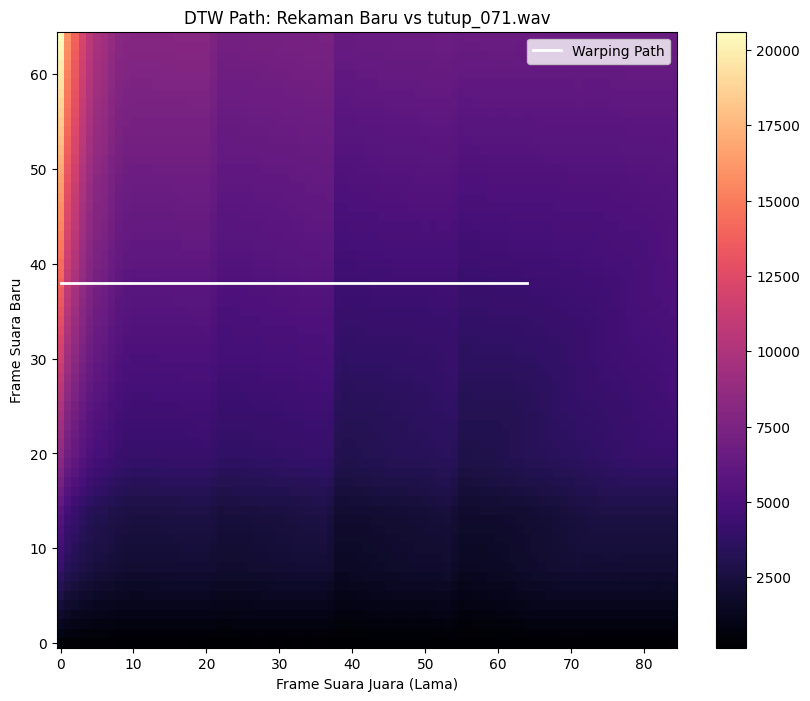

In [13]:
import librosa
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display

# --- KONFIGURASI ---
FOLDER_DATASET_LAMA = "./dataset/data-hasil/tutup/" # Folder dataset lama
FILE_BARU = "tutup_test_baru.wav"                   # File yang baru direkam
SAMPLE_RATE = 22050

def hitung_jarak_dtw(file1, file2):
    try:
        # 1. Load Audio
        y1, _ = librosa.load(file1, sr=SAMPLE_RATE)
        y2, _ = librosa.load(file2, sr=SAMPLE_RATE)

        # 2. Ekstrak Fitur (MFCC)
        # Penting: Jangan dirata-rata (mean), kita butuh urutan waktunya
        mfcc1 = librosa.feature.mfcc(y=y1, sr=SAMPLE_RATE, n_mfcc=13)
        mfcc2 = librosa.feature.mfcc(y=y2, sr=SAMPLE_RATE, n_mfcc=13)

        # 3. Hitung DTW
        # Menggunakan subsequence=True agar lebih fleksibel terhadap durasi
        D, wp = librosa.sequence.dtw(mfcc1, mfcc2, subseq=True)

        # 4. Hitung Skor Normalisasi
        # Biaya total dibagi panjang jalur agar adil
        jarak = D[-1, -1] / wp.shape[0]
        
        return jarak, mfcc1, mfcc2, wp, D
    except Exception as e:
        print(f"Gagal memproses {file2}: {e}")
        return float('inf'), None, None, None, None

# --- PROSES UTAMA ---
print(f"Sedang membandingkan '{FILE_BARU}' dengan seluruh dataset di '{FOLDER_DATASET_LAMA}'...")

hasil_analisis = []

if os.path.exists(FOLDER_DATASET_LAMA):
    files = [f for f in os.listdir(FOLDER_DATASET_LAMA) if f.endswith('.wav')]
    
    if not files:
        print("Folder dataset kosong!")
    else:
        # Loop semua file lama
        for i, file_lama in enumerate(files):
            path_file_lama = os.path.join(FOLDER_DATASET_LAMA, file_lama)
            
            # Hitung DTW
            jarak, _, _, _, _ = hitung_jarak_dtw(FILE_BARU, path_file_lama)
            
            # Simpan hasil
            hasil_analisis.append({
                "File Lama": file_lama,
                "Jarak DTW": jarak
            })
            
            # Print progress setiap 10 file
            if (i+1) % 10 == 0:
                print(f"Memproses {i+1}/{len(files)} data...")

        # --- MEMBUAT PERINGKAT ---
        # Urutkan dari jarak terkecil (Paling Mirip) ke terbesar
        df_hasil = pd.DataFrame(hasil_analisis)
        df_hasil = df_hasil.sort_values(by="Jarak DTW", ascending=True).reset_index(drop=True)
        
        # Tampilkan Top 10 Paling Mirip
        print("\n" + "="*40)
        print("TOP 10 SUARA PALING MIRIP (Jarak Terkecil)")
        print("="*40)
        print(df_hasil.head(10))
        
        # --- VISUALISASI PEMENANG ---
        # Kita ambil juara 1 (index 0) untuk divisualisasikan
        juara_file = df_hasil.iloc[0]["File Lama"]
        juara_jarak = df_hasil.iloc[0]["Jarak DTW"]
        path_juara = os.path.join(FOLDER_DATASET_LAMA, juara_file)
        
        print(f"\n>>> Visualisasi Juara 1: {juara_file} (Skor: {juara_jarak:.4f})")
        
        # Hitung ulang DTW untuk plotting
        dist, mfcc_baru, mfcc_juara, wp, D = hitung_jarak_dtw(FILE_BARU, path_juara)
        
        plt.figure(figsize=(10, 8))
        
        # Plot Cost Matrix
        librosa.display.specshow(D, x_axis='frames', y_axis='frames')
        plt.plot(wp[:, 1], wp[:, 0], label='Warping Path', color='w', linewidth=2)
        plt.title(f"DTW Path: Rekaman Baru vs {juara_file}")
        plt.xlabel("Frame Suara Juara (Lama)")
        plt.ylabel("Frame Suara Baru")
        plt.legend()
        plt.colorbar()
        plt.show()

else:
    print("Folder dataset tidak ditemukan!")